<a href="https://colab.research.google.com/github/andreeo/computer-vision/blob/main/basic_image_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Image Operations

We will cover


1. Copying and creating new images
2. Cropping an image section
4. Resizing an Image
5. Creating binary masks for images

Now in computer vision applications we deal with rectangular regions. For example, if you are doing face detection the output of a face detector is a rectangular bouding box around the face but sometimes that's not sufficient.

Sometimes we want to work with groups of pixels that are not rectangular in shape. For example, *if you want to do skin detection, you want to specify which pixels are skinned and which pixels are not skinned and in such cases we use a binary mask.*

A binary mask is an image which  is  the  same size as the original image  and it is binary, it has two values - white and black.

White pixels usually indicate the region we are interesed in and black pixels represents everything else.

For example, in skin detector would be a binary mask where white pixels would represent the locations of skin pixels and black pixels would be everything else.

So  now we will learn about binary masks and how to manipulate them.



#Import libraries

In [3]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']  = (6.0,  6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

#Import data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -qq drive/MyDrive/opencv-data/week1_python.zip  -d  /content/week1_python

Mounted at /content/drive
mapname:  conversion of  failed


In [5]:
imagePath = "/content/week1_python/data/images"

#Create new images

In [6]:
#read image

image = cv2.imread(imagePath+"/boy.jpg")

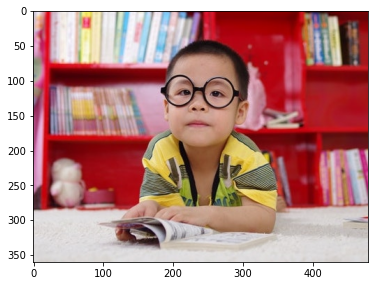

In [7]:
#see what image we are dealing with
plt.imshow(image[:,:,::-1])

#Create copy of an image

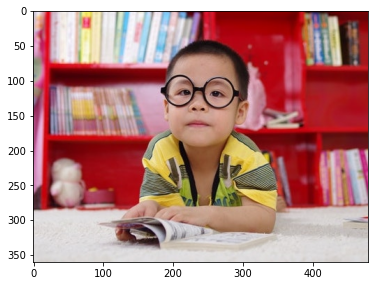

In [75]:
#create a new image by copying the already  present image using the copy operation
imageCopy = image.copy()

#see the copied imaged
plt.imshow(imageCopy[:,:,::-1])

#Create a empty matrix

Create an empty matrix with size (100,200)


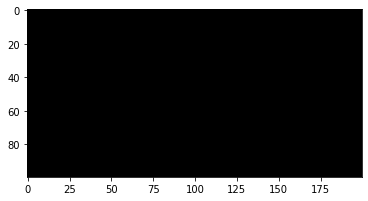

In [8]:
emptyMatrix= np.zeros((100, 200, 3), dtype='uint8')
plt.imshow(emptyMatrix)

Let's fill it with white pixels

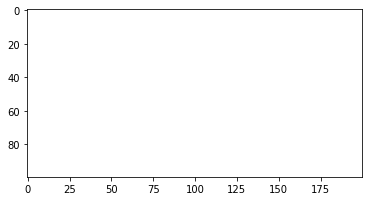

In [11]:
emptyMatrix = 255*np.ones((100, 200, 3),  dtype='uint8')
plt.imshow(emptyMatrix)

#Create a empty matrix of the same  size  as  original image

Creat e empty matrix  of  the size  as  original image and fill it with 100

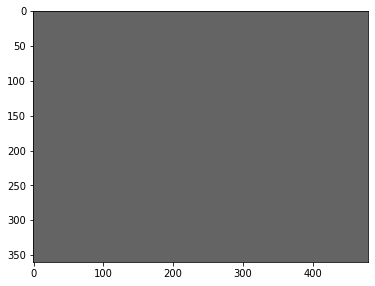

In [13]:
emptyOriginalMatrix = 100*np.ones_like(image)
plt.imshow(emptyOriginalMatrix)

# Cropping an Image Section

Cropping, as the name suggest is cutting out a portion from the image. A good example of using image cropping is in the creation of Memes, where people crope someone's face and put on top of another etc. We know how to do it in photo editing softwares. Let us see how it can done using code so that you can do it more intelligently when required.

Let's crop hist face. For that, we need to find the approximation region where the face is present. From the figure, you can see that the face lies somewhere in the region.

* between row #50 to row #200
* between col #170 to col #320

So, for cropping out this area, we need select this region from the original matrix and assign it to another variable. This is the cropped out image.

**NOTE:
In numpy, the first index is for height or row and 2nd one is for width or column. But in OpenCV it is mostly width and height (think of it as opencv talks in terms of (x,y) whereas numpy talks in terms of row and column)**


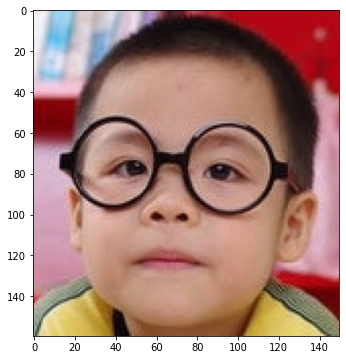

In [76]:
#crop out a rectangule
#x coordinates = 170 to 320
#y coordiantes = 40 to  200
crop = imageCopy[40:200, 170:320]

plt.imshow(crop[:,:,::-1])

#Copying a Region to another

Once you have cropped a part of image, you can past it to another image by choosing where you want to paste it.

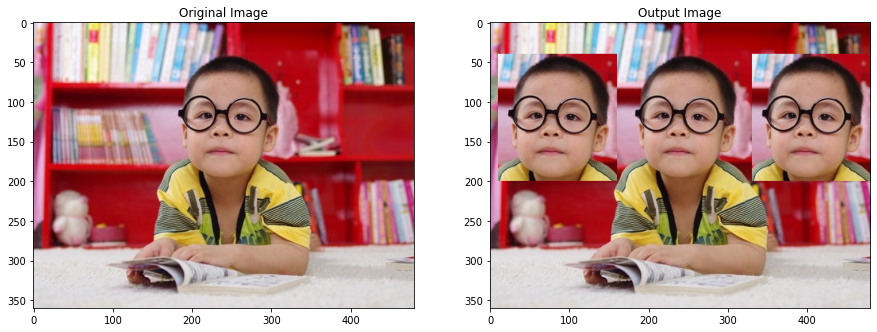

In [77]:
#fing height and weight of the ROI
height,width = crop.shape[:2]

imageCopy[40:40+height, 10:10+width] = crop
imageCopy[40:40+height, 330:330+width] = crop


#Display the output
plt.figure(figsize=[15,15])

plt.subplot(121);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(122);
plt.imshow(imageCopy[...,::-1]);
plt.title("Output Image");

#Resizing an image

check the [resize](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) function for resizing an image.

There are two ways of using the resize function.

1. Specify width and height of output image explicitly

  > Use the **dsize** argument to specify the output size in the form(width,height)

2. Specify the scaling factors for resizing (for both width and heigth)

  > Use **fx** and **fy** arguments to specify the scaling factor for horizontal and vertical axis respectively. It should be a float. The output size is calculated as: `Size(round(fx*src.cols), round(fy*src.rows))`







## &nbsp;Method1 - Specifying width and height

You have to manually keep track of the aspect ratio of the output image as this method will no preserve the aspect ratio between input and output image.

For example

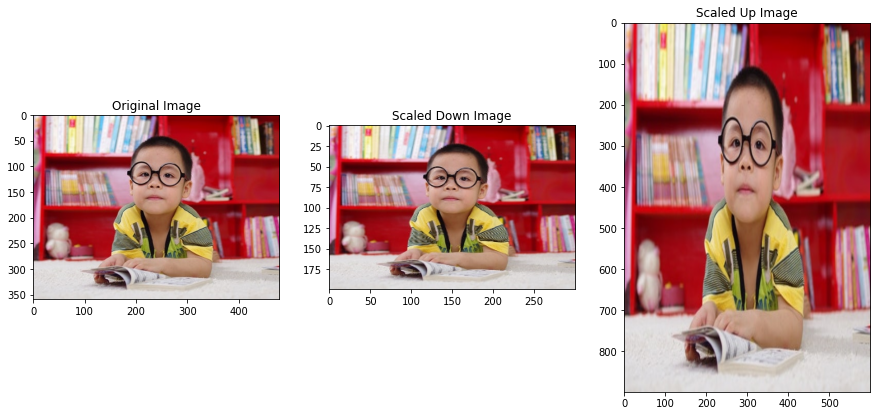

In [80]:
resizeDownWidth = 300
resizeDownHeight  = 200
resizeDown  = cv2.resize(image, (resizeDownWidth,  resizeDownHeight), interpolation=cv2.INTER_LINEAR)

resizeUpWidth = 600
resizeUpHeight  = 900
resizeUp  = cv2.resize(image, (resizeUpWidth,  resizeUpHeight), interpolation=cv2.INTER_LINEAR)


plt.figure(figsize=[15,15])

plt.subplot(131);
plt.imshow(image[:,:,::-1]);
plt.title("Original Image");

plt.subplot(132);
plt.imshow(resizeDown[:,:,::-1]);
plt.title("Scaled Down Image");

plt.subplot(133);
plt.imshow(resizeUp[:,:,::-1]);
plt.title("Scaled Up Image");



You can see that the output images have been scaled( check the axes )

It is also evident that the aspect ratio for the scaledUp output has been totally ruined. In most cases, it is a good idea to use the scaling factor to resize images.

## &nbsp;Method2 - Specifying scaling factor

This method is useful when you want to preserve the aspect ratio of the image. For example, say you have an image of size 400x600 and you want the width to be 360. Then, instead of specifying the height, you find the scaling factor (i.e 360/600 = 0.6) and use it to resize the image.



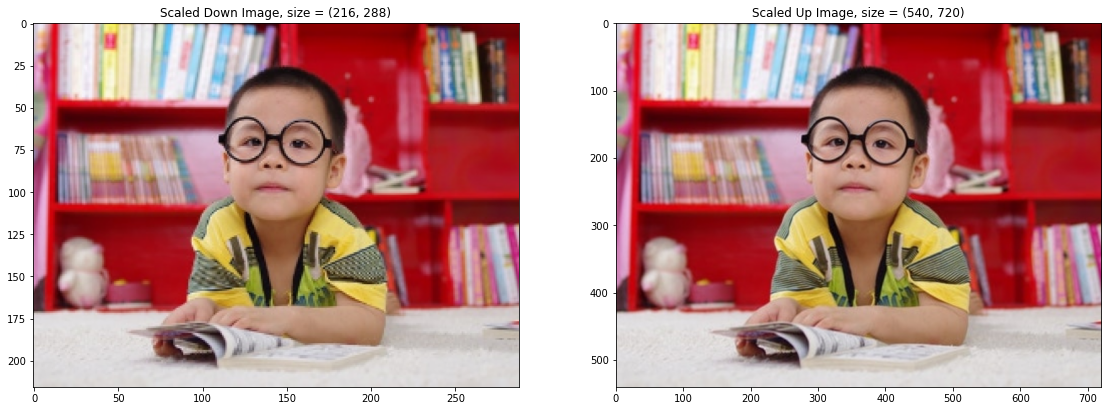

In [93]:
#Scaling up the image 1.5 times by specifying both scaling factors
scaleUpX = 1.5
scaleUpY = 1.5

#scaling down the  image 0.6 times specifying a single scale factor
scaleDown  = 0.6

scaledUp = cv2.resize(image, None, fx=scaleUpX, fy=scaleUpY, interpolation=cv2.INTER_LINEAR)
scaledDown = cv2.resize(image, None, fx=scaleDown, fy=scaleDown, interpolation=cv2.INTER_LINEAR)

# Displaying image
plt.figure(figsize=[40,40])


#plt.subplot(141);
#plt.imshow(image[:,:,::-1]);
#plt.title("Original Image")

plt.subplot(142);
plt.imshow(scaledDown[...,::-1]);
plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]));

plt.subplot(143);
plt.imshow(scaledUp[...,::-1]);
plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]));

# Creating an Image Mask

Masking is a very important step in many image processing and computer vision algorithms. The goal is to segment out the are of interest and apply your algorithm to a specific part of the image and put  it back on the original image.

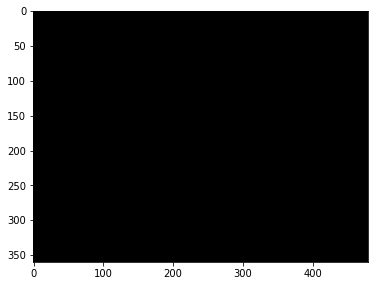

In [94]:
#Create an empty image of same size as the original
mask1 = np.zeros_like(image)
plt.imshow(mask1)

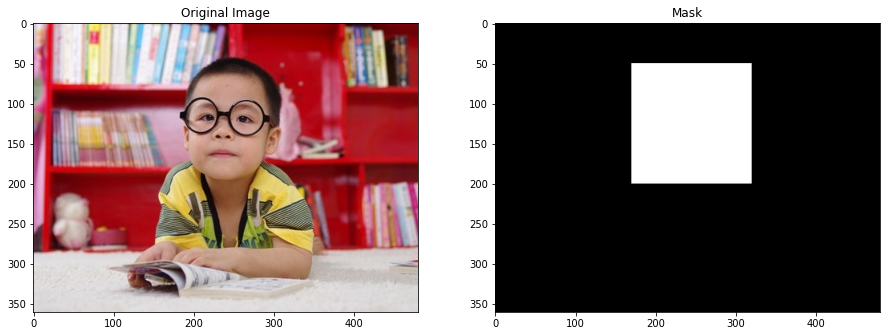

In [99]:
mask1[50:200,170:320] = 255
plt.figure(figsize=[40,40])

plt.subplot(151);
plt.imshow(image[:,:,::-1]);
plt.title("Original Image");

plt.subplot(152);
plt.imshow(mask1[:,:,::-1]);
plt.title("Mask");


This is the mask for the face region of the input image

## Create a mask using pixel  intensity or color

Another way of creating masks is by using some logic. One example is using a simple color information. For example, let us try find out the pixels which are approximately red in color.

If we want to focus on red pixels, the simplest logic that does the trick is:

* The red channel should have high intensity (keep the range of pixels values from 100 to 255)
* The other 2 channels should have low intensity(keep the range of pixels values in Blue and Green channels  between 0 to 100)

There is a nice OpenCV function which can do exactly this. We will use the opencv fuction [inRange](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

This function products a binary image (pixels are either black or white)

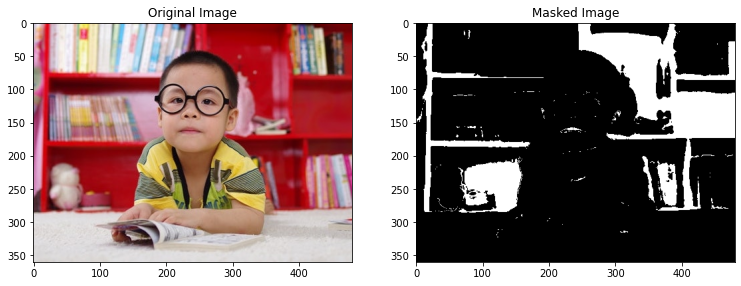

In [98]:
mask2 = cv2.inRange(image, (0,0,150), (100,100,255))

plt.figure(figsize=[40,40])

plt.subplot(161);
plt.imshow(image[...,::-1]);
plt.title("Original Image");

plt.subplot(162);
plt.imshow(mask2);
plt.title("Masked Image");
